In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col=0)
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
# 작업용 데이터프레임 만들기
en_scores = np.array(df.english[:10])
ma_scores = np.array(df.mathematics[:10])

scores_df = pd.DataFrame({'english': en_scores,
                         'mathematics': ma_scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                         name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 두 데이터 간 상관관계를 나타내는 지표
<br>

#### 공분산 (covariance)
    데이터의 관계성을 수치화한 지표이다.
    최솟값 0, 양의 최댓값 1, 음의 최댓값 -1을 가지며 공분산이 0일 경우 두 데이터는 무상관이라고 한다.
    무상관이라는 말은 곧 서로간에 미치는 영향력이 없다는 뜻과도 같다.
<br>

#### 상관계수 (correlation coefficient)
    단위에 의존하지 않으면서 상관관계를 나타내는 지표.
    상관계수는 반드시 -1 ≤ 상관계수 ≤ 1 범위 안에 있으며, 절댓값이 1에 가까울수록 상관도가 높아진다.
    상관관계가 0일 경우 두 데이터는 무상관이며, 절댓값이 1인 경우 두 데이터는 완전히 직선상에 놓인다.

In [4]:
sample = scores_df.copy()
sample['E deviation'] = sample.english - sample.english.mean()
sample['M deviation'] = sample.mathematics - sample.mathematics.mean()
sample['product of deviation'] = sample['E deviation']*sample['M deviation']
sample

,english,mathematics,E deviation,M deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
# 두 데이터 간 공분산을 함수로 구해보면
cov = np.cov(sample.english, sample.mathematics) # np.cov 함수는 공분산 '행렬'을 반환합니다
display(cov, cov[0,1].round(3))

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

69.778

In [6]:
# 두 데이터 간 공분산을 수식으로 구해보면
cov = (sample['E deviation']*sample['M deviation']).sum()/(len(sample)-1)
cov.round(3)
# 기본적으로 불편분산(자유도 1)로 계산하는 것이 수식 꼬이지 않고 좋다.

69.778

In [7]:
# 아 싫어요. 표준분산으로 해줘요.
display(np.cov(sample.english, sample.mathematics,ddof=0)[0,1].round(3),
        (sample['E deviation']*sample['M deviation']).sum()/len(sample))
# 해드렸습니다.

62.8

62.8

In [8]:
# 상관관계를 구해볼게요. 두 가지 방법으루다가.
display(np.corrcoef(en_scores, ma_scores), # 이건 numpy
       scores_df.corr())                   # 이건 pandas

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


## 2차원 데이터의 시각화

#### 산점도 (scatter)

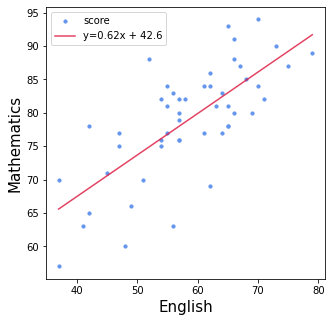

In [9]:
eng = df.english
math = df.mathematics

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.scatter(eng, math, color='cornflowerblue',s=10,label='score')
ax.set_xlabel('English',fontsize=15)
ax.set_ylabel('Mathematics',fontsize=15)

# 여기에 회귀직선도 넣어볼 거야.
# 방정식을 만드는 polyfit 함수를 써서!
poly = np.polyfit(eng,math,1) # eng 점수와 math 점수를 변수로 갖는 1차 방정식의 계수
poly1d = np.poly1d(poly) # 해당 계수로 1차 방정식 생성
xrange = np.linspace(eng.min(),eng.max()) # x축이 영어이니까 맞춰서 범위 생성
ax.plot(xrange, poly1d(xrange), color='crimson',alpha=0.8,
        label=f'y={poly[0].round(2)}x + {poly[1].round(2)}')
ax.legend()
plt.show()

#### 히트맵 (heat map)
    히스토그램의 2차원 버전.
    hist2d(histogram 2-dimention) 메소드를 이용해 작성한다.

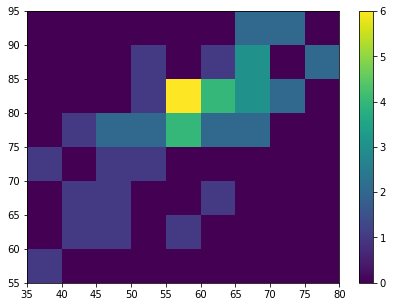

In [10]:
plt.figure(figsize=(7,5))
plt.hist2d(eng,math, bins = [9,8], # 2차원 히스토그램이므로 bins도 2차원으로 지정해주자
           range=[(35,80),(55,95)])
plt.colorbar()
plt.show()

## 앤스컴의 예
    통계적 자료가 일치하는 데이터들이 그래프로 나타내면 전혀 다른 모양을 띄고 있는 경우도 있다.
    그만큼 데이터 분석을 시작하기 앞서 데이터를 시각화하는 습관을 들여야 통계적 오류에 빠지지 않을 것이다.
    물론 지표는 많은 의미를 갖지만, 데이터의 구성 방식은 무한하기 때문에 지표들을 과신하지 말고 가능하면 그래프로 그려보고 그 경향을 파악하는 것이 좋다.

# 추측통계
<br>

### 모집단과 표본
<br>

#### 모집단 (population)
    추측하고 싶은 관측대상 전체.
    추측통계에서는 일부 집단에 대해 통계적 성질을 적용해 모집단의 성질을 추측한다.
    모집단의 모수는 표본집단의 표본통계량과 일맥상통한다.
<br>

#### 표본 (sample)
    추측에 사용하는, 관측대상의 일부분.
    표본을 추출하는 것을 표본추출(sampling)이라 하며, 표본통계량을 통해 모집단의 모수를 추측할 수 있다.
    모수를 추정할 때 사용할 통계량을 '추정량(estimator)', 표본을 사용해 구한 통계량을 '추정값(estimate)'이라고 한다.
<br>

#### 무작위 추출 (random sampling)
    모수를 추정할 때에는 편향이 생기지 않도록 임의로 표본을 추출하는 것이 중요한데, 이를 무작위 추출이라 한다.
    동일 집단에서 반복을 허용하는 추출을 복원 추출, 반복을 허용하지 않는 추출을 비복원 추출이라 하며, np.random.choice() 함수에서 replace=True/False 값으로 표현할 수 있다.

In [11]:
# 복원추출과 비복원추출의 예시
a = [1,2,3,4,5]
display(np.random.choice(a, 5, replace=True), # choice는 복원추출이 기본값이다
       np.random.choice(a, 5, replace=False))

array([3, 2, 5, 1, 5])

array([3, 1, 4, 5, 2])

In [12]:
# 모평균과 무작위 복원추출로 얻은 표본평균도 비교해 보자.
# 추출은 10개만, 영어점수에 한해서 우선 구해보자.

df = pd.read_csv('./data/ch2_scores_em.csv', index_col=0)
scores = df.english

print(f'모평균: {scores.mean()}\n')
for i in range(10):
    print(f'{i+1}번째 무작위 복원추출로 얻은 표본평균: {np.random.choice(scores,10).mean()}')

# 뭐 거의 비슷하게 나온다는 것을 알 수 있습니다.
# 이때 표본평균이 추정량, 수치가 추정값인 것이죠.

모평균: 58.38

1번째 무작위 복원추출로 얻은 표본평균: 59.9
2번째 무작위 복원추출로 얻은 표본평균: 58.2
3번째 무작위 복원추출로 얻은 표본평균: 52.7
4번째 무작위 복원추출로 얻은 표본평균: 56.0
5번째 무작위 복원추출로 얻은 표본평균: 65.7
6번째 무작위 복원추출로 얻은 표본평균: 58.4
7번째 무작위 복원추출로 얻은 표본평균: 60.2
8번째 무작위 복원추출로 얻은 표본평균: 55.4
9번째 무작위 복원추출로 얻은 표본평균: 61.3
10번째 무작위 복원추출로 얻은 표본평균: 54.5


## 확률 모형
<br>

#### 확률변수 (random variable)
    결과를 알아맞힐 수는 없지만, 취하는 값의 목록과 각각의 확률이 결정되어 있는 것을 뜻한다.
    주사위에 대해서는 각각의 눈과 그 확률을 알고 있으며, 이때 주사위의 눈을 확률변수라 부른다.
- 시행: 확률변수의 값을 관찰하는 단위 행위.<br># 주사위를 1번 굴렸다.
- 실현값: 시행에 의해 관측되는 값.<br># 눈이 4가 나왔다.
- 사건: 시행 결과로 인해 나타날 수 있는 모든 종류의 일.<br># 눈이 3 이상일 경우, 눈이 짝수일 경우 등등
- 근원사건: 더 이상 세부적으로 분해할 수 없는 사건.<br># 눈이 짝수일 경우는 2,4,6으로 나눌 수 있기 때문에 근원사건이 아니지만,<br># 눈이 4인 경우는 오직 한 가지뿐이므로 근원사건이다.
<br>

#### 상호배반 (mutally exclusive)
    동시에 일어날 수 없는 각 사건 간의 관계.
    # 눈이 홀수인 것과 2가 나오는 사건은 상호배반이며, 이 때의 확률은 두 경우가 각각 일어날 확률을 더한 것과 같다.
<br>

#### 확률분포 (probality distribution)
    확률변수의 집단이 어떤 확률을 따를 때, 그 확률의 분포를 확률분포라 한다.
    # 주사위의 눈이 확률 변수, 각 눈이 나올 확률의 분포가 확률분포인 셈.

In [13]:
# 불공정한 주사위 모델로 검증해 보자.

dice = [1,2,3,4,5,6]
prob = []
for i in dice:
    prob.append(i/sum(dice))
    
# 불공정한 주사위 던지기 시행 100번
np.random.seed(2)
sample = np.random.choice(dice,100, p=prob)
sample

array([4, 1, 5, 4, 4, 4, 3, 5, 4, 3, 5, 5, 2, 5, 3, 6, 6, 5, 6, 2, 5, 2,
       4, 2, 2, 5, 3, 2, 3, 4, 4, 3, 5, 5, 5, 4, 6, 5, 3, 5, 6, 5, 6, 4,
       5, 4, 4, 6, 5, 6, 5, 2, 4, 6, 4, 1, 3, 2, 6, 6, 6, 5, 6, 3, 4, 5,
       4, 1, 6, 4, 5, 4, 3, 4, 6, 6, 4, 1, 6, 3, 5, 1, 5, 4, 5, 4, 4, 5,
       6, 2, 4, 1, 6, 5, 3, 4, 5, 5, 3, 6])

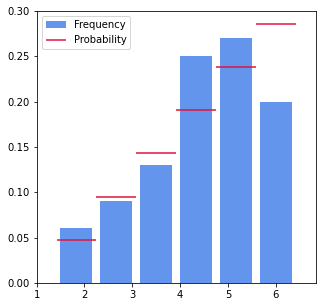

array([0.06, 0.09, 0.13, 0.25, 0.27, 0.2 ])

In [14]:
# 결과를 히스토그램으로 그려보자

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
freq, _,_ = ax.hist(sample, bins=6,range=(1,7), # range를 정해주면 그 범위에 맞춰서 출력해줌
                    density=True, color='cornflowerblue', label='Frequency',
                   rwidth=0.8)
#ax1 = ax.twinx()
ax.hlines(prob,np.arange(1,7), np.arange(2,8),
          color='crimson', label='Probability')
plt.legend()
plt.xlim(0.5,7.5)
ax.set_xticks(np.linspace(0.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
plt.show()
freq

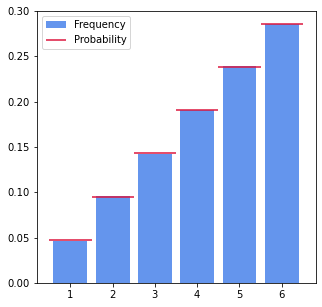

1.0

In [19]:
# 만약 표본추출이 10만개가 되어서 그 상대도수를 본다면
# 그래프는 확률과 비슷하게 그려질까?

sample = np.random.choice(dice,100000,p=prob)

plt.figure(figsize=(5,5))
a,_,_ = plt.hist(sample, bins=6, range=(1,7),color='cornflowerblue',
        rwidth=0.8, density=True, label='Frequency') # 상대도수를 봐야 확률과 비교 가능
plt.hlines(prob, np.arange(1,7), np.arange(2,8), color='crimson',label='Probability')
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7))
plt.legend()
plt.show()

# 상대도수는 비율이기 때문에 확률의 성질도 함께 지닌다.
a.sum() # 일단 bin의 값이 확률변수의 개수와 맞아 떨어져서 이렇게 나오는데
# 만약 bin이 변수의 개수보다 많으면 (상대도수의 합)*(변수/bins)를 해주면 1이 나올 것

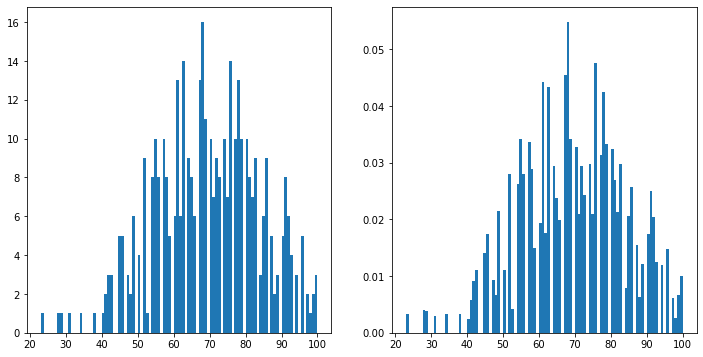

In [16]:
# 무작위추출로 얻은 표본모형을 모집단의 모형과 비슷하다고,
# 표본으로 얻은 통계량을 모집단의 모수와 비슷하다고 추정할 수 있다

df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df.score)

sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(df,bins=100)# 점수는 1점단위로
ax2.hist(sample,bins=100,density=True)
plt.show()
# 거의 비슷합니당

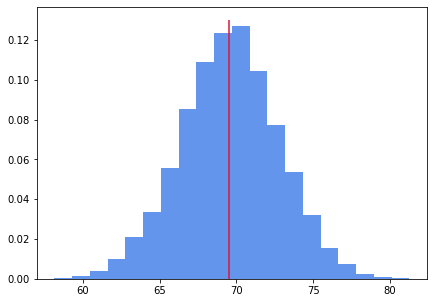

In [17]:
# 표본평균도 어디에 위치할 경우가 많은지 보자.
np.random.seed(0)
sample = [np.random.choice(scores,20).mean() for _ in range(10000)]

plt.figure(figsize=(7,5))
plt.hist(sample,bins=20,density=True,color='cornflowerblue')
plt.vlines(scores.mean(),0,0.13,color='crimson')
plt.show()
# 모평균과 근사하게 표본평균이 나올 확률이 높다.